In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.multiclass import OneVsRestClassifier

In [2]:
data1 = pd.read_csv(r"C:\Users\Asus\OneDrive\Documents\PE1\Known Languages\CopyKnownDataWLang.csv")
kd = data1['Language']
kd

0         English
1         English
2         English
3         English
4         English
           ...   
179997    Spanish
179998    Spanish
179999    Spanish
180000     Arabic
180001       Urdu
Name: Language, Length: 180002, dtype: object

In [3]:
data2 = pd.read_csv(r"C:\Users\Asus\OneDrive\Documents\PE1\Unknown Languages\UnknownDataWithLang.csv")
ukd = data2['Language']
ukd

0         Arabic
1         Arabic
2         Arabic
3         Arabic
4         Arabic
           ...  
359995     Hindi
359996     Hindi
359997     Hindi
359998     Hindi
359999     Hindi
Name: Language, Length: 360000, dtype: object

In [4]:
data = pd.read_csv(r"C:\Users\Asus\OneDrive\Documents\PE1\CopyFullDataWithlang.csv")
data

,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Text,Language
0,0,0.0,0.0,0.0,â€œ2020 marked one of the most successful year...,English
1,1,1.0,1.0,1.0,"""27 cases were found in Toronto.""",English
2,2,2.0,2.0,2.0,$36 million was spent on general & administrat...,English
3,3,3.0,3.0,3.0,Â« 6 stories making headlines this weeâ€¦Updat...,English
4,4,4.0,4.0,4.0,A 10ft great white shark has attacked and kill...,English
...,...,...,...,...,...,...
480000,480000,480000.0,480000.0,480000.0,आपल्या आत्मविश्वासाने आपल्या स्वप्नांचे साकार ...,Marathi
480001,480001,480001.0,480001.0,NaN,இன்று மாலை வெள்ளியில் குளிர்காலத்தில் உடைந்து...,Tamil
480002,480002,480002.0,480002.0,NaN,இன்று மாலை வெள்ளியில் குளிர்காலத்தில் உடைந்து...,Tamil
480003,480003,480003.0,NaN,NaN,أنا أحب القراءة والكتابة والتعلم.,Arabic


In [5]:
md = data['Language']
md

0         English
1         English
2         English
3         English
4         English
           ...   
480000    Marathi
480001      Tamil
480002      Tamil
480003     Arabic
480004       Urdu
Name: Language, Length: 480005, dtype: object

In [6]:
vec = TfidfVectorizer()
X = data['Text']
y = data['Language']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', OneVsRestClassifier(LogisticRegression(solver='liblinear')))
])


pipeline.fit(X_train, y_train)


Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf',
                 OneVsRestClassifier(estimator=LogisticRegression(solver='liblinear')))])

In [7]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5)  

print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

Cross-validation scores: [0.91408966 0.91425893 0.91343863 0.91152459 0.9128125 ]
Mean cross-validation score: 0.9132248611671724


In [8]:
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score,confusion_matrix,ConfusionMatrixDisplay

In [9]:
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', OneVsRestClassifier(LogisticRegression(solver='liblinear')))
])


pipeline.fit(X_train, y_train)

accuracy = pipeline.score(X_test, y_test)
print("Model Accuracy:", accuracy)

Model Accuracy: 0.9142092269872188


In [10]:
f1_score(pipeline.predict(X_test),y_test,average = "macro")

0.9138702603583877

In [11]:
f1_score(pipeline.predict(X_test),y_test,average = "micro")

0.9142092269872188

In [12]:
text_example = "Привет, как дела"
predicted_language = pipeline.predict([text_example])[0]
print("Predicted Language Label:", predicted_language)

predicted_language_probabilities = pipeline.predict_proba([text_example])[0]
predicted_language_index = list(pipeline.classes_).index(predicted_language)
predicted_language_label = pipeline.classes_[predicted_language_index]
print("Predicted Language Label:", predicted_language_label)

Predicted Language Label: Indonesian
Predicted Language Label: Indonesian


In [13]:
text_example = "தமிழ் மொழி அதிக பயன்படுத்தப்படும் மொழிகளில் ஒன்றாகும்."
predicted_language = pipeline.predict([text_example])[0]
print("Predicted Language Label:", predicted_language)

predicted_language_probabilities = pipeline.predict_proba([text_example])[0]
predicted_language_index = list(pipeline.classes_).index(predicted_language)
predicted_language_label = pipeline.classes_[predicted_language_index]
print("Predicted Language Label:", predicted_language_label)

Predicted Language Label: Indonesian
Predicted Language Label: Indonesian


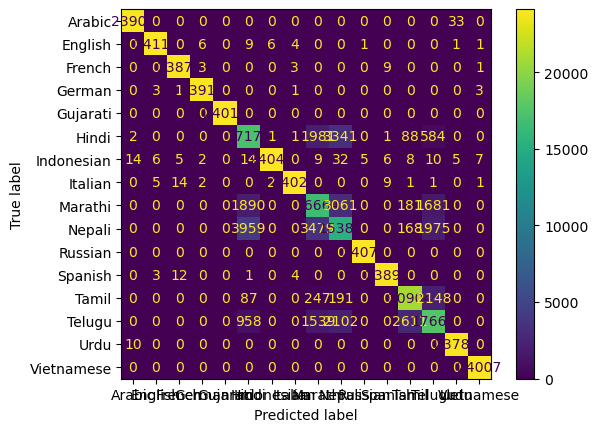

<Figure size 3000x3000 with 0 Axes>

In [14]:
cm = confusion_matrix(pipeline.predict(X_train),y_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=pipeline.classes_)
disp.plot()
fig = plt.figure(figsize = (30,30))

In [20]:
Text = str(input("Enter text: "))
print("Text is:", Text)
predicted_language = pipeline.predict([Text])[0]
print("Predicted Language:", predicted_language)

predicted_language_probabilities = pipeline.predict_proba([Text])[0]
predicted_language_index = list(pipeline.classes_).index(predicted_language)
predicted_language_label = pipeline.classes_[predicted_language_index]
print("Predicted Language label:", predicted_language_label)


if predicted_language_label in kd.values:
    print(predicted_language_label,"is a known language.")

elif predicted_language_label in ukd.values:
    label = str(input("Enter language label:"))
    print("Selected label is:", label)
    new_df = pd.DataFrame({"Text": [Text], "Language": [label]})
    data = pd.concat([data, new_df], axis=0, ignore_index=True)
    data1 = pd.concat([data1, new_df], axis=0, ignore_index=True)

else:
    print("Enter valid label.")   

Text is: hello how are you today
Predicted Language: English
Predicted Language label: English
English is a known language.


In [21]:
Text = str(input("Enter text: "))
print("Text is:", Text)
predicted_language = pipeline.predict([Text])[0]
print("Predicted Language:", predicted_language)

predicted_language_probabilities = pipeline.predict_proba([Text])[0]
predicted_language_index = list(pipeline.classes_).index(predicted_language)
predicted_language_label = pipeline.classes_[predicted_language_index]
print("Predicted Language label:", predicted_language_label)


if predicted_language_label in kd.values:
    print(predicted_language_label,"is a known language.")

elif predicted_language_label in ukd.values:
    label = str(input("Enter language label:"))
    print("Selected label is:", label)
    new_df = pd.DataFrame({"Text": [Text], "Language": [label]})
    data = pd.concat([data, new_df], axis=0, ignore_index=True)
    data1 = pd.concat([data1, new_df], axis=0, ignore_index=True)

else:
    print("Enter valid label.")   

Text is: مرحبا بالعالم! كيف حالكم اليوم؟
Predicted Language: Indonesian
Predicted Language label: Indonesian
Selected label is: Arabic


In [22]:
data

,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Text,Language
0,0.0,0.0,0.0,0.0,â€œ2020 marked one of the most successful year...,English
1,1.0,1.0,1.0,1.0,"""27 cases were found in Toronto.""",English
2,2.0,2.0,2.0,2.0,$36 million was spent on general & administrat...,English
3,3.0,3.0,3.0,3.0,Â« 6 stories making headlines this weeâ€¦Updat...,English
4,4.0,4.0,4.0,4.0,A 10ft great white shark has attacked and kill...,English
...,...,...,...,...,...,...
480001,480001.0,480001.0,480001.0,NaN,இன்று மாலை வெள்ளியில் குளிர்காலத்தில் உடைந்து...,Tamil
480002,480002.0,480002.0,480002.0,NaN,இன்று மாலை வெள்ளியில் குளிர்காலத்தில் உடைந்து...,Tamil
480003,480003.0,480003.0,NaN,NaN,أنا أحب القراءة والكتابة والتعلم.,Arabic
480004,480004.0,NaN,NaN,NaN,میرے دل کی دھڑکنوں میں تمہارا نام ہے، تمہارے ب...,Urdu


In [18]:
data1

In [19]:
# data = data.to_csv(r"C:\Users\Asus\OneDrive\Documents\PE1\CopyFullDataWithlang.csv")
# data1 = data1.to_csv(r"C:\Users\Asus\OneDrive\Documents\PE1\Known Languages\CopyKnownDataWLang.csv")